In [20]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from google.colab import files  # Import untuk upload file di Colab

# Unggah file dari komputer
uploaded = files.upload()

# Membaca data dari file yang baru diunggah
data = pd.read_excel(next(iter(uploaded)))  # Membaca file dari hasil upload


Saving Data BPS.xlsx to Data BPS.xlsx


In [22]:
# Cek informasi data
print(data.info())

# Cek missing values
print(data.isnull().sum())

# Mengisi missing values pada kolom numerik dengan mean
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Memilih kolom numerik
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Mengisi missing values pada kolom non-numerik dengan mode (nilai terbanyak)
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns  # Memilih kolom non-numerik
for column in non_numeric_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)  # Mengisi dengan mode (nilai yang paling sering muncul)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 55 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1 non-null      object 
 1   Unnamed: 1   18 non-null     object 
 2   Unnamed: 2   18 non-null     object 
 3   Unnamed: 3   18 non-null     object 
 4   Unnamed: 4   14 non-null     object 
 5   Unnamed: 5   14 non-null     object 
 6   Unnamed: 6   14 non-null     object 
 7   Unnamed: 7   13 non-null     object 
 8   Unnamed: 8   13 non-null     object 
 9   Unnamed: 9   15 non-null     object 
 10  Unnamed: 10  13 non-null     object 
 11  Unnamed: 11  15 non-null     object 
 12  Unnamed: 12  13 non-null     object 
 13  Unnamed: 13  15 non-null     object 
 14  Unnamed: 14  15 non-null     object 
 15  Unnamed: 15  13 non-null     object 
 16  Unnamed: 16  15 non-null     object 
 17  Unnamed: 17  13 non-null     object 
 18  Unnamed: 18  13 non-null     object 
 19  Unnamed: 1

<ipython-input-22-e970a98dc202>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)  # Mengisi dengan mode (nilai yang paling sering muncul)
<ipython-input-22-e970a98dc202>:14: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  data[column].fillna(data[column].mode()[0], inplace=True)  # Mengisi dengan mode (nilai yang paling sering muncul)
<ipython-input-22-e970a98dc202>:14: UserWarning: Unable to sort modes: '<' not supported bet

In [24]:
# Memilih hanya kolom numerik
numeric_columns = data.select_dtypes(include=[np.number]).columns
data_numeric = data[numeric_columns]

# Inisialisasi scaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Membuat dataframe baru yang sudah di-scale
data_scaled = pd.DataFrame(data_scaled, columns=numeric_columns)

# Menyimpan kolom non-numerik untuk digabungkan kembali
non_numeric_data = data.select_dtypes(exclude=[np.number])

# Menggabungkan data yang sudah di-scale dengan kolom non-numerik
data_final = pd.concat([data_scaled, non_numeric_data.reset_index(drop=True)], axis=1)


4

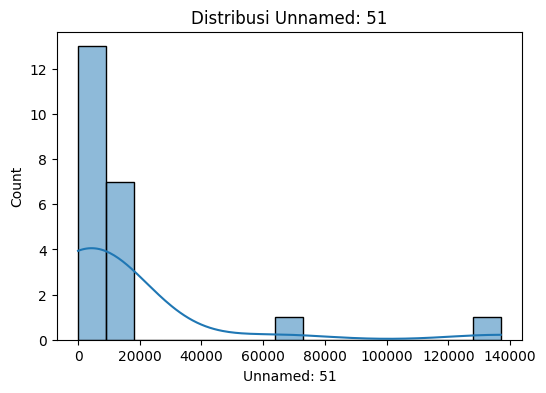

In [26]:
# Loop untuk membuat histogram hanya untuk kolom numerik
for column in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.show()


Kolom non-numerik: Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54'],
      dtype='object')


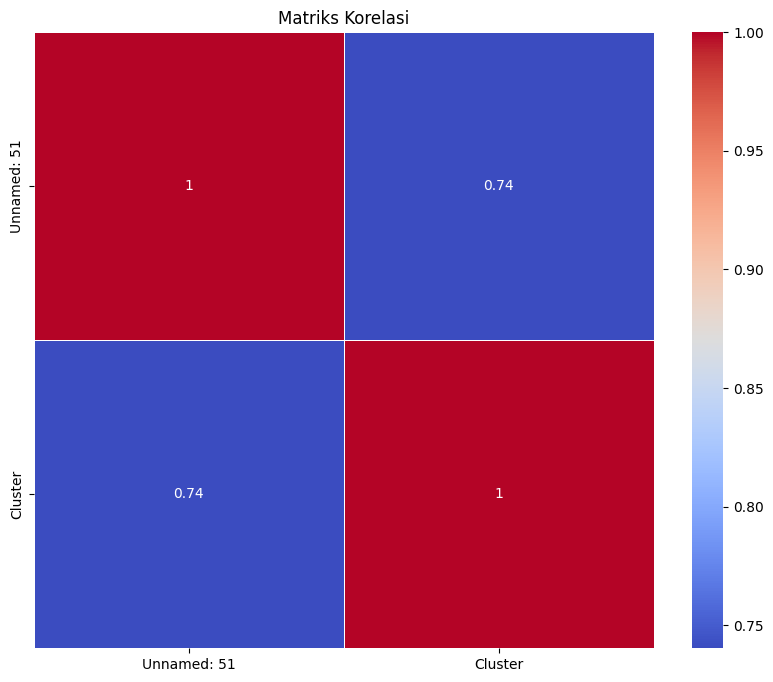

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan 'data' adalah DataFrame Anda

# Langkah 1: Identifikasi kolom yang tidak bernilai numerik
kolom_non_numerik = data.select_dtypes(exclude=['number']).columns
print("Kolom non-numerik:", kolom_non_numerik)

# Langkah 2: Hapus kolom yang tidak bernilai numerik
data_numerik = data.select_dtypes(include=['number'])

# Langkah 3: Hitung dan plot matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(data_numerik.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()


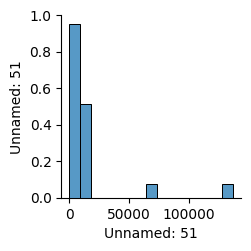

In [28]:
sns.pairplot(data)
plt.show()


5

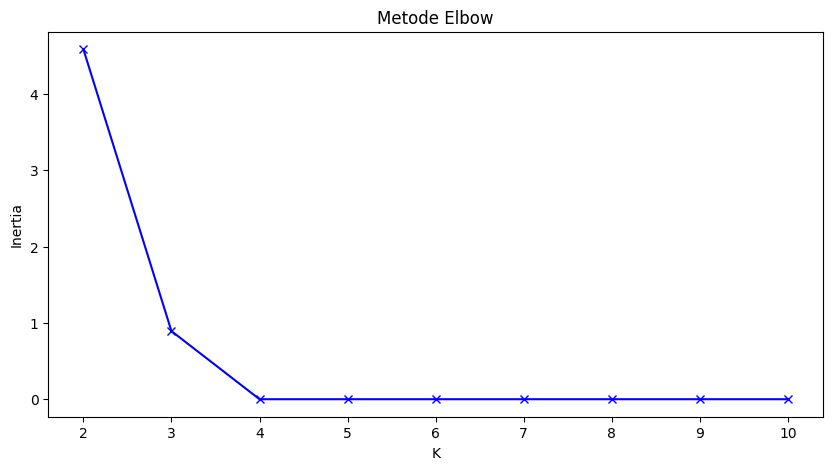

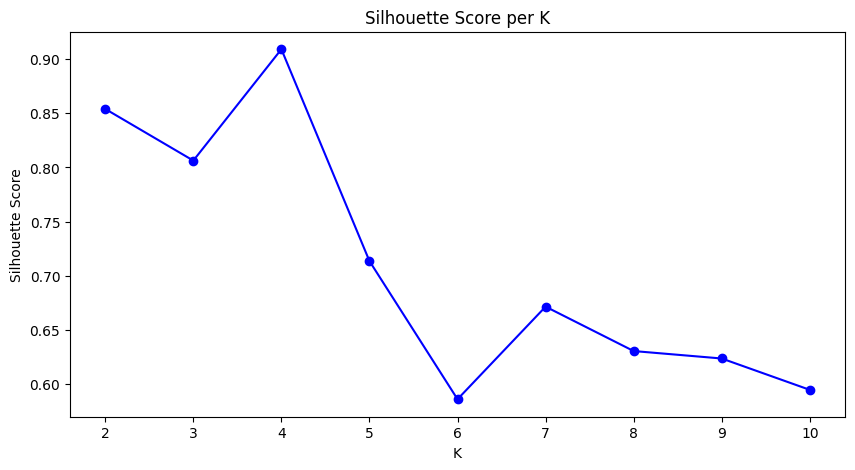

In [29]:
# Menentukan nilai K terbaik menggunakan metode Elbow dan Silhouette Score
inertia = []
silhouette_scores = []

K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Visualisasi Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Metode Elbow')
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score per K')
plt.show()



In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Asumsikan 'data' adalah DataFrame Anda

# Langkah 1: Periksa kolom yang tidak bernilai numerik
kolom_non_numerik = data.select_dtypes(exclude=['number']).columns
print("Kolom non-numerik:", kolom_non_numerik)

# Langkah 2: Konversi kolom non-numerik menjadi numerik jika diperlukan
# Contoh: mengonversi kolom dengan nilai 'YES'/'NO'
for kolom in kolom_non_numerik:
    if data[kolom].dtype == 'object':
        data[kolom] = data[kolom].map({'YES': 1, 'NO': 0})  # Gantilah sesuai dengan nilai yang ada

# Langkah 3: Hapus kolom non-numerik jika tidak relevan
# data = data.drop(columns=kolom_non_numerik)  # Hapus kolom non-numerik jika perlu

# Langkah 4: Normalisasi Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=['number']))  # Ambil hanya kolom numerik

# Misal kita pilih K optimal dari hasil Elbow atau Silhouette
k_optimal = 3  # Sesuaikan dengan hasil

# Langkah 5: KMeans Clustering
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Tambahkan kolom Cluster ke DataFrame asli
data['Cluster'] = clusters

# Langkah 6: Visualisasi PCA
n_features = data_scaled.shape[1]
print("Jumlah fitur dalam data_scaled:", n_features)

if n_features > 1:
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_scaled)

    data_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
    data_pca['Cluster'] = clusters

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data_pca, palette='viridis', s=60, alpha=0.8)
    plt.title('Clustering dengan KMeans (PCA)')
    plt.show()
else:
    print("Tidak cukup fitur untuk melakukan PCA. Pastikan data memiliki lebih dari satu fitur.")


Kolom non-numerik: Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [35]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Misalkan data_scaled adalah DataFrame Anda dan clusters adalah hasil clustering
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # Ubah nilai perplexity di sini
data_tsne = tsne.fit_transform(data_scaled)

data_tsne = pd.DataFrame(data_tsne, columns=['TSNE1', 'TSNE2'])
data_tsne['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=data_tsne, palette='viridis', s=60, alpha=0.8)
plt.title('Clustering dengan KMeans (t-SNE)')
plt.show()


ValueError: perplexity must be less than n_samples